## Lab 5 - Using link functions to create generalized linear models

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

In [377]:
df = pd.read_csv('airline_data.csv')
df

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [370]:
df['Miles flown [100 mln miles]'] /= 1000
df

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3.863
1,1977,25,516,4.300
2,1978,31,754,5.027
3,1979,31,877,5.481
4,1980,22,814,5.814
5,1981,21,362,6.033
6,1982,26,764,5.877
7,1983,20,809,6.223
8,1984,16,223,7.433
9,1985,22,1066,7.107


In [378]:
df['Miles centered'] = df['Miles flown [100 mln miles]'] - df['Miles flown [100 mln miles]'].mean()
df['Miles centered'].describe()

count    1.000000e+01
mean    -1.818989e-13
std      1.117768e+03
min     -1.852800e+03
25%     -5.753000e+02
50%      1.297000e+02
75%      4.597000e+02
max      1.717200e+03
Name: Miles centered, dtype: float64

### Prior predictive distribution

In [372]:
model_1 = CmdStanModel(stan_file="code_1.stan")

INFO:cmdstanpy:found newer exe file, not recompiling


In [373]:
R = 1000
sample=model_1.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,
                     refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [374]:
df = sample.draws_pd()
df

,lp__,accept_stat__,theta,alpha,n,lambda,accidents
0,0.0,0.0,0.770817,3.77718,-1.272270,16.38710,15.0
1,0.0,0.0,0.416611,5.39842,-1.704840,108.65300,99.0
2,0.0,0.0,0.574349,3.65597,0.230099,44.17360,37.0
3,0.0,0.0,0.559894,2.97798,1.312050,40.95950,27.0
4,0.0,0.0,0.465787,2.68887,1.660650,31.89280,35.0
...,...,...,...,...,...,...,...
995,0.0,0.0,0.386574,2.60193,0.335451,15.35750,19.0
996,0.0,0.0,0.532390,4.56077,0.282876,111.20500,104.0
997,0.0,0.0,0.624437,2.29647,-0.600628,6.83064,12.0
998,0.0,0.0,0.459557,3.49405,-1.141180,19.48430,23.0


In [353]:
lambdas = sample.draws_pd()['lambda'].values
accidents = sample.draws_pd().accidents.values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


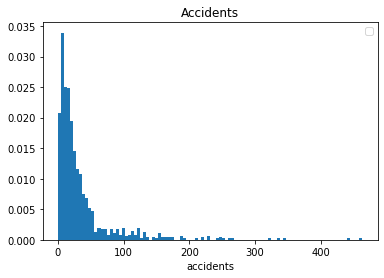

In [354]:
plt.hist(accidents, density=True, bins=100)
plt.title('Accidents')
plt.xlabel('accidents')
plt.legend()
plt.show()

### Posterior predictive distribution

In [325]:
model_2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [365]:
data_fit = {'N': len(df), 'miles': df['Miles centered'].values, 'accidents': df['Fatal accidents'].values}
fit = model_2.sample(data=data_fit, seed=15042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                     

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [366]:
fit_df = fit.draws_pd()
fit_df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,lambda[1],lambda[2],lambda[3],lambda[4],lambda[5],lambda[6],lambda[7],lambda[8],lambda[9],lambda[10]
0,-8.492030e+16,1.0,3.300360e-13,1.0,1.0,0.0,8.492120e+16,-1.22332,-0.021699,8.491390e+16,6.468670e+12,911537.0,48.0184,0.034939,0.000302,0.008905,0.000005,1.933370e-17,2.282690e-14
1,-8.491680e+16,1.0,3.300360e-13,2.0,3.0,0.0,8.492030e+16,-1.22332,-0.021699,8.491030e+16,6.468460e+12,911522.0,48.0181,0.034939,0.000302,0.008905,0.000005,1.933450e-17,2.282760e-14
2,-8.491590e+16,1.0,3.300360e-13,1.0,1.0,0.0,8.491680e+16,-1.22332,-0.021699,8.490940e+16,6.468410e+12,911519.0,48.0180,0.034939,0.000302,0.008905,0.000005,1.933470e-17,2.282780e-14
3,-8.490160e+16,1.0,3.300360e-13,3.0,7.0,0.0,8.491590e+16,-1.22332,-0.021699,8.489510e+16,6.467580e+12,911462.0,48.0170,0.034939,0.000302,0.008905,0.000005,1.933770e-17,2.283070e-14
4,-8.489800e+16,1.0,3.300360e-13,2.0,3.0,0.0,8.490160e+16,-1.22332,-0.021699,8.489160e+16,6.467370e+12,911448.0,48.0168,0.034939,0.000302,0.008905,0.000005,1.933840e-17,2.283140e-14


In [360]:
years = df['Year'].values
observed_lambda = df['Fatal accidents'].values
sampled_lambdas = fit_df.loc[:, "lambda[1]":"lambda[10]"]

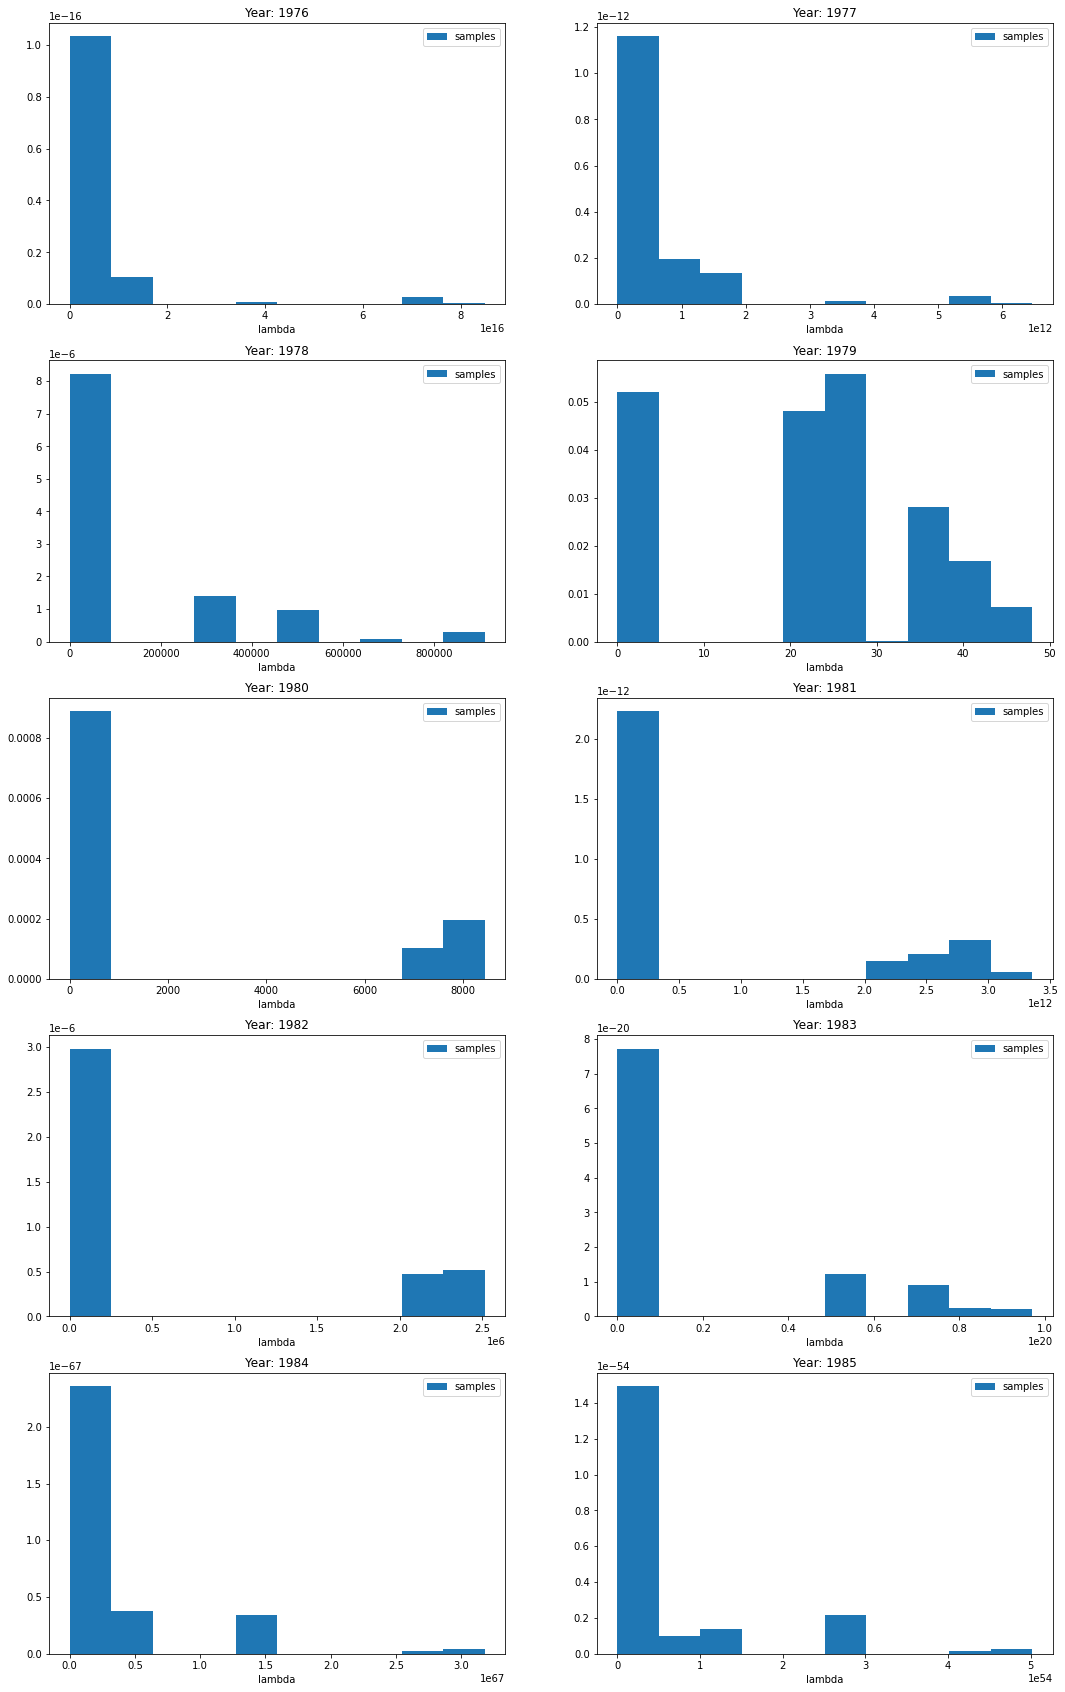

In [361]:
fig, axes = plt.subplots(int(len(df)/2), 2, figsize=(18, 30))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.hist(sampled_lambdas[f'lambda[{i + 1}]'].values, density=True, label='samples')
    ax.set_xlabel('lambda')
    ax.set_title(f'Year: {years[i]}')
    ax.legend()